# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

df = pd.read_csv('winequality_edited.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
acidity_levels          6496 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [3]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

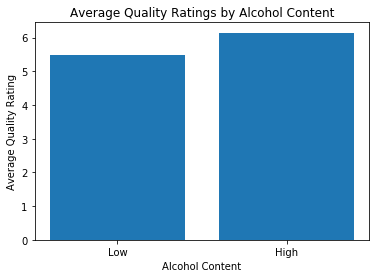

In [5]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [6]:
# Use query to select each group and get its mean quality
median_sugar = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < {}'.format(median_sugar))
high_sugar = df.query('residual_sugar >= {}'.format(median_sugar))

low_sugar_mean_quality = low_sugar['quality'].mean()
low_sugar_mean_quality
high_sugar_mean_quality = high_sugar['quality'].mean()

In [7]:
high_sugar_mean_quality

5.8278287461773699

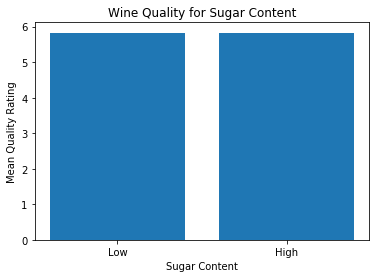

In [8]:
# Create a bar chart with proper labels
locations_sugar = [1,2]
points = [low_sugar_mean_quality, high_sugar_mean_quality]
labels_sugar = ['Low', 'High']
plt.bar(locations_sugar, points, tick_label=labels_sugar)
plt.title('Wine Quality for Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Mean Quality Rating'); #Include semi-colon to avoid text being printed 


### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [9]:
# Use groupby to get the mean quality for each acidity level
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
bin_edges = [ 2.72, 3.11,3.21 , 3.32,4.01 ] # Filling this list with five values of pH
bin_names = [ 'High','Moderately High' ,'Medium' ,'Low' ]


In [11]:
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Meduim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [57]:
# Find the mean quality of each acidity level with groupby
quality_acidity_mean = []
quality_acidity_mean = df.groupby('acidity_levels').mean()['quality']
quality_acidity_mean


acidity_levels
High               5.783343
Moderately High    5.784540
Meduim             5.850832
Low                5.859593
Name: quality, dtype: float64

In [24]:
acidity_mean = df.groupby('acidity_levels').mean()['pH']

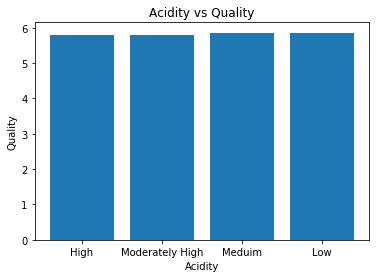

In [23]:
# Create a bar chart with proper labels
locations_pH = [1,2,3,4]

#points = [low_sugar_mean_quality, high_sugar_mean_quality]
#plt.bar(locations_sugar, points, tick_label=labels_sugar)

plt.bar(locations_pH,quality_acidity_mean, tick_label=bin_names)
plt.title('Acidity vs Quality')
plt.xlabel('Acidity')
plt.ylabel('Quality');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

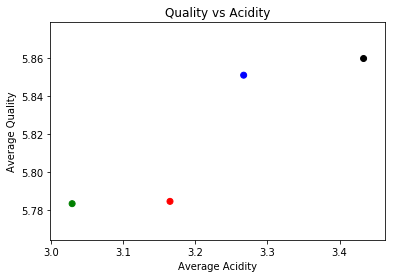

In [51]:
plt.scatter(y=quality_acidity_mean, x=acidity_mean,color='grbk')
plt.xlabel('Average Acidity')
plt.ylabel('Average Quality')
plt.title('Quality vs Acidity');


Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?
- Bar charts seem almost at same heights as the variances are very slight.
- Scatter plot shows the barely discernible differences better 

In [55]:
quality_acidity_mean


acidity_levels
High               5.783343
Moderately High    5.784540
Meduim             5.850832
Low                5.859593
Name: quality, dtype: float64

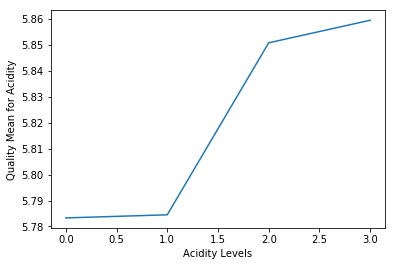

In [59]:
import matplotlib.pyplot as plt
plt.plot([5.7833,5.7845, 5.8508, 5.8595])
plt.ylabel('Quality Mean for Acidity')
plt.xlabel('Acidity Levels')
plt.show();

In this line plot, we see clearly that quality rises as does acidity.